# Plot persistence times vs. clade 

Here, I am just doing a very simple mapping of each cluster. For each cluster, pull out the clades of each tip in it. Then group them into some higher order groupings and see whether it correlates with persistence times at all. 

In [1]:
import glob
import re,copy, imp
import pandas as pd 
import numpy as np

# for this to work, you will need to download the most recent version of baltic, available here 
bt = imp.load_source('baltic', '/Users/lmoncla/src/baltic/baltic/baltic.py')

%matplotlib inline
import matplotlib as mpl
from matplotlib import pyplot as plt
import matplotlib.patheffects as path_effects
import matplotlib.lines as mlines
from matplotlib.font_manager import FontProperties
import matplotlib.colors as clr
import textwrap as textwrap
from textwrap import wrap

import time
from io import StringIO

import rpy2
%load_ext rpy2.ipython

In [82]:
from datetime import date
current_date = str(date.today())

# define colors 
domestic_color="#4E83AE"
wild_color="#CEB540"
human_color="#DE4428"

In [2]:
h5n1_clades_file = "/Users/lmoncla/src/avian-flu/clade-labeling/h5n1-clades.tsv"

In [4]:
h5n1_clades_dict = {}

with open(h5n1_clades_file, "r") as infile: 
    for line in infile: 
        strain = line.split("\t")[0]
        clade = line.split("\t")[1].strip()
        h5n1_clades_dict[strain] = clade
        
#print(h5n1_clades_dict)

In [31]:
# read in persistence timees tsv output 
persistence_times = "beast-runs/2021-07-26-mascot-3deme-skyline-with-mig-fixed-log/with-extra-logger/combined-muts-trees-2021-08-23.muts-circulation-time-vs-human-tips-2022-04-02.tsv"

persistence_times_dict = {}

with open(persistence_times, "r") as infile:
    for line in infile:
        
        tree_number = line.split("\t")[1]
        tips_list = line.split("\t")[5].replace("[","").replace("]","").replace("\'","").strip().split(", ")
        persistence_times_dict[str(tips_list)] = []
        
        for t in tips_list:
            strain_name = t.split("|")[0]
            if strain_name in h5n1_clades_dict:
                persistence_times_dict[str(tips_list)].append(h5n1_clades_dict[strain_name])
                
            else:
                print("no clade for", strain_name)

no clade for tips_in_subtree


In [54]:
print(len(persistence_times_dict))

26964


In [ ]:
# clade_mapping = {"0":["0"],
#                  "1":["1","1.1","1.1-like","1.1.1","1.1.2"],
#                  "2.1":["2-like","2.1.1","2.1.2","2.1.3","2.1.3.1","2.1.3.2","2.1.3.2a","2.1.3.2b","2.1.3.3"], 
#                  "2.2":["2.2","2.2.1","2.2.1.1","2.2.1.1a","2.2.1.2","2.2.2","2.2.2.1"], 
#                  "2.3":["2.3.1","2.3.2","2.3.2.1","2.3.2.1a","2.3.2.1b","2.3.2.1c","2.3.3","2.3.4","2.3.4-like","2.3.4.1","2.3.4.2","2.3.4.3","2.3.4.4"],
#                  "other":["2.4","2.5","3","3-like","4","5","5-6-like","6","7","7.1","7.2","8","8-9-like","9","EA-nonGsGD","Am-nonGsGD","1-8-9-like"]}

In [86]:
# condense clades into groups
clade_mapping = {"0":"0",
 
"1":"1",
"1.1":"1",
"1.1-like":"1",
"1.1.1":"1",
"1.1.2":"1",
 
"2.1":"2.1",
"2-like":"2.1",
"2.1.1":"2.1",
"2.1.2":"2.1",
"2.1.3":"2.1",
"2.1.3.1":"2.1",
"2.1.3.2":"2.1",
"2.1.3.2a":"2.1",
"2.1.3.2b":"2.1",
"2.1.3.3":"2.1",
 
"2.2":"2.2",
"2.2.1":"2.2",
"2.2.1.1":"2.2",
"2.2.1.1a":"2.2",
"2.2.1.2":"2.2",
"2.2.2":"2.2",
"2.2.2.1":"2.2",
 
"2.3":"2.3",
"2.3.2":"2.3",
"2.3.2.1":"2.3",
"2.3.2.1a":"2.3",
"2.3.2.1b":"2.3",
"2.3.2.1c":"2.3",
                 
"2.3.4":"2.3.4",
"2.3.4-like":"2.3.4",
"2.3.4.1":"2.3.4",
"2.3.4.2":"2.3.4",
"2.3.4.3":"2.3.4",
"2.3.4.4":"2.3.4",
 
"2.4":"other",
"2.5":"other",
"3":"other",
"3-like":"other",
"4":"other",
"5":"other",
"5-6-like":"other",
"6":"other",
"7":"other",
"7.1":"other",
"7.2":"other",
"8":"other",
"8-9-like":"other",
"9":"other",
"EA-nonGsGD":"other",
"Am-nonGsGD":"other",
"1-8-9-like":"other"}

In [87]:
# let's see if we can condense these into a few categories: 0, 1, 2.1, 2.2, 2.3, and other 

persistence_times_dict2 = {}
mixed = 0
single = 0

# for each cluster
for p in persistence_times_dict: 
    clade_groups = []
    
    if p != "['tips_in_subtree']":
        # for each clade in the cluster, assign it a clade group 
        for clade in persistence_times_dict[p]:
            clade_group = clade_mapping[clade]
            clade_groups.append(clade_group)

        if len(set(clade_groups)) > 1:
            mixed += 1
            persistence_times_dict2[p] = ["mixed"]
        else: 
            single += 1
            persistence_times_dict2[p] = [str(set(clade_groups)).replace("{","").replace("}","").replace("\'","")]

print(mixed, single)

1420 25543


In [88]:
#persistence_times_dict2

In [89]:
clades_df = pd.DataFrame.from_dict(persistence_times_dict2, orient="index")
clades_df.reset_index(inplace=True)
clades_df.columns = ["tips_in_subtree","clade_group"]
clades_df.head()

,tips_in_subtree,clade_group
0,['A/Chicken/HongKong/786/1997|1997.0|1997-XX-X...,0
1,['A/Goose/Guangdong/1/1996|1996.0|1996-XX-XX|A...,0
2,['A/duck/Guangxi/07/1999|1999.0|1999-XX-XX|Avi...,0
3,['A/Goose/HongKong/3853/2000|2000.0|2000-XX-XX...,0
4,['A/Goose/HongKong/761/2001|2001.0|2001-XX-XX|...,other


In [90]:
# merge with other dataframee 
# read dataframe back in 
df = pd.read_csv("beast-runs/2021-07-26-mascot-3deme-skyline-with-mig-fixed-log/with-extra-logger/combined-muts-trees-2021-08-23.muts-circulation-time-vs-human-tips-2022-04-02.tsv", sep="\t")
print(len(df))
df.head()

518358


,Unnamed: 0,tree_number,subtree_number,circulation_time,n_human_tips,tips_in_subtree
0,0,1,1,2.518589,2,['A/Chicken/HongKong/786/1997|1997.0|1997-XX-X...
1,0,1,2,0.607684,0,['A/Goose/Guangdong/1/1996|1996.0|1996-XX-XX|A...
2,0,1,3,1.901901,0,['A/duck/Guangxi/07/1999|1999.0|1999-XX-XX|Avi...
3,0,1,4,0.447087,0,['A/Goose/HongKong/3853/2000|2000.0|2000-XX-XX...
4,0,1,5,0.657898,0,['A/Goose/HongKong/761/2001|2001.0|2001-XX-XX|...


In [91]:
df_with_clade = df.merge(clades_df, on="tips_in_subtree")
print(len(df_with_clade))
df_with_clade.head()

518358


,Unnamed: 0,tree_number,subtree_number,circulation_time,n_human_tips,tips_in_subtree,clade_group
0,0,1,1,2.518589,2,['A/Chicken/HongKong/786/1997|1997.0|1997-XX-X...,0
1,0,4,1,2.252142,2,['A/Chicken/HongKong/786/1997|1997.0|1997-XX-X...,0
2,0,7,1,2.188843,2,['A/Chicken/HongKong/786/1997|1997.0|1997-XX-X...,0
3,0,15,1,1.765992,2,['A/Chicken/HongKong/786/1997|1997.0|1997-XX-X...,0
4,0,16,1,2.393945,2,['A/Chicken/HongKong/786/1997|1997.0|1997-XX-X...,0


In [92]:
# plot together 
df_with_clade['human_tips'] = np.where(df_with_clade['n_human_tips']==0, 0, 1)
df_with_clade.head()

,Unnamed: 0,tree_number,subtree_number,circulation_time,n_human_tips,tips_in_subtree,clade_group,human_tips
0,0,1,1,2.518589,2,['A/Chicken/HongKong/786/1997|1997.0|1997-XX-X...,0,1
1,0,4,1,2.252142,2,['A/Chicken/HongKong/786/1997|1997.0|1997-XX-X...,0,1
2,0,7,1,2.188843,2,['A/Chicken/HongKong/786/1997|1997.0|1997-XX-X...,0,1
3,0,15,1,1.765992,2,['A/Chicken/HongKong/786/1997|1997.0|1997-XX-X...,0,1
4,0,16,1,2.393945,2,['A/Chicken/HongKong/786/1997|1997.0|1997-XX-X...,0,1


In [93]:
# let's see whether it makes to run this as a logistic regression on having human tips or not 
%R -i df_with_clade
%R model.human_tips = glm(human_tips~circulation_time+clade_group,data=df_with_clade,family = binomial(link="logit"),na.action(na.omit))
%R print(summary(model.human_tips))  # print the summary
%R print(exp(coef(model.human_tips)))  # exponentiate the coefficients
%R print(exp(confint(model.human_tips)))   # exponentiate the confidence intervals
%R print(anova(model.human_tips, test="Chisq"))  # run a chi square?


Call:
glm(formula = human_tips ~ circulation_time + clade_group, family = binomial(link = "logit"), 
    data = df_with_clade, weights = na.action(na.omit))

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.1855  -0.4454  -0.2958  -0.2669   2.6024  

Coefficients:
                  Estimate Std. Error  z value Pr(>|z|)    
(Intercept)      -1.395305   0.017727  -78.709  < 2e-16 ***
circulation_time  0.517255   0.002826  183.039  < 2e-16 ***
clade_group1      1.514959   0.022556   67.163  < 2e-16 ***
clade_group2.1    0.162535   0.035464    4.583 4.58e-06 ***
clade_group2.2   -0.914599   0.019861  -46.050  < 2e-16 ***
clade_group2.3   -1.960177   0.019340 -101.354  < 2e-16 ***
clade_group2.3.4  0.628747   0.021004   29.935  < 2e-16 ***
clade_groupmixed  0.686058   0.285000    2.407   0.0161 *  
clade_groupother -1.333946   0.026110  -51.090  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family tak

     (Intercept) circulation_time     clade_group1   clade_group2.1 
       0.2477574        1.6774171        4.5492363        1.1764895 
  clade_group2.2   clade_group2.3 clade_group2.3.4 clade_groupmixed 
       0.4006774        0.1408335        1.8752589        1.9858715 
clade_groupother 
       0.2634356 


                     2.5 %    97.5 %
(Intercept)      0.2392782 0.2564974
circulation_time 1.6681717 1.6867535
clade_group1     4.3527557 4.7551576
clade_group2.1   1.0973894 1.2610653
clade_group2.2   0.3853988 0.4166028
clade_group2.3   0.1356023 0.1462824
clade_group2.3.4 1.7997174 1.9541656
clade_groupmixed 1.1795777 3.6334301
clade_groupother 0.2502828 0.2772563


Analysis of Deviance Table

Model: binomial, link: logit

Response: human_tips

Terms added sequentially (first to last)


                 Df Deviance Resid. Df Resid. Dev  Pr(>Chi)    
NULL                            518357     479477              
circulation_time  1    95506    518356     383971 < 2.2e-16 ***
clade_group       7    71493    518349     312478 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [94]:
%%R -w 800 -h 500 -u px -i df_with_clade

reg1 <- lm(n_human_tips~circulation_time+clade_group,data=df_with_clade) 
print(summary(reg1))


Call:
lm(formula = n_human_tips ~ circulation_time + clade_group, data = df_with_clade)

Residuals:
    Min      1Q  Median      3Q     Max 
-42.795  -0.534   0.287   0.656  75.282 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -0.787303   0.020204 -38.967   <2e-16 ***
circulation_time  1.289930   0.002055 627.697   <2e-16 ***
clade_group1      2.031704   0.025870  78.536   <2e-16 ***
clade_group2.1    5.172907   0.036883 140.252   <2e-16 ***
clade_group2.2    0.198941   0.021759   9.143   <2e-16 ***
clade_group2.3   -0.050722   0.020671  -2.454   0.0141 *  
clade_group2.3.4 -0.048531   0.024312  -1.996   0.0459 *  
clade_groupmixed 22.369069   0.075522 296.194   <2e-16 ***
clade_groupother -1.829955   0.025588 -71.516   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.603 on 518349 degrees of freedom
Multiple R-squared:  0.6249,	Adjusted R-squared:  0.6249 
F-statistic: 1.079e+05 on 

In [95]:
%%R -w 800 -h 500 -u px -i df_with_clade

reg1 <- lm(circulation_time~clade_group,data=df_with_clade) 
print(summary(reg1))


Call:
lm(formula = circulation_time ~ clade_group, data = df_with_clade)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.0167  -0.6755  -0.4205   0.1741  13.0010 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)       0.92008    0.01360   67.67   <2e-16 ***
clade_group1      1.49122    0.01736   85.89   <2e-16 ***
clade_group2.1    3.48415    0.02445  142.47   <2e-16 ***
clade_group2.2    0.17243    0.01470   11.73   <2e-16 ***
clade_group2.3   -0.21203    0.01397  -15.18   <2e-16 ***
clade_group2.3.4  1.51100    0.01630   92.72   <2e-16 ***
clade_groupmixed 11.56523    0.04845  238.70   <2e-16 ***
clade_groupother  1.28095    0.01720   74.46   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.759 on 518350 degrees of freedom
Multiple R-squared:  0.2225,	Adjusted R-squared:  0.2225 
F-statistic: 2.119e+04 on 7 and 518350 DF,  p-value: < 2.2e-16



### Interpretation

My interpretation here is that there is an effect of clade, even when accounting for circulation time, and vice versa. 

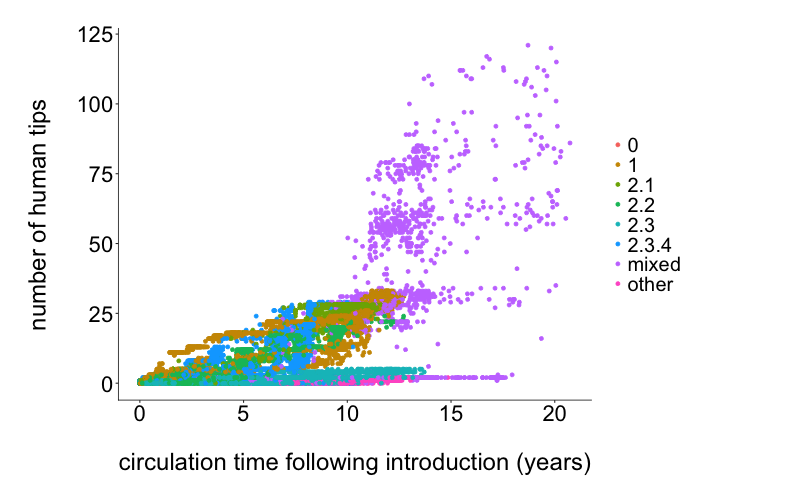

In [96]:
%%R -w 800 -h 500 -u px -i df_with_clade,current_date,human_color,wild_color,domestic_color # this sets the size of the plot...otherwise, it will go off the page

require(ggplot2)
library(ggplot2)
library(RColorBrewer)


output_filename = paste("circulation-time-vs-human-tips-clade-",current_date,".png", sep="")

p <- ggplot(data=df_with_clade, aes(x=circulation_time, y=n_human_tips, color=clade_group), alpha = 0.5) + 
    geom_point()+
    labs(x="\ncirculation time following introduction (years)", y="number of human tips\n")+
#      scale_y_continuous(breaks=seq(0,40,5), limits=c(0,40))+
#      scale_x_continuous(breaks=seq(0,15,3), limits=c(0,15))+
    theme(panel.grid.major=element_line(colour=NA,size=NA))+    
    theme(panel.grid.minor=element_line(colour=NA,size=NA))+    
    theme(strip.background = element_rect(colour=NA, fill=NA))+
    theme(axis.line.x=element_line(colour="black"))+
    theme(axis.line.y=element_line(colour="black"))+
    theme(axis.title=element_text(size=24, vjust=5))+
    theme(axis.text.y=element_text(size=22, colour="black"))+
    theme(axis.text.x=element_text(size=22, colour="black", hjust=0.5))+
    theme(legend.text=element_text(size=20))+
    theme(legend.title=element_blank())+
    theme(panel.margin=unit(1, "lines"))+
    theme(plot.margin=unit(c(1,4,1,1),"cm"))+
    theme(legend.key.size=unit(0.7, "cm"))+
    theme(panel.background=element_rect(fill=NA))+
    theme(legend.key=element_rect(fill=NA))
    ##theme(legend.position = c(legend_x, legend_y))

ggsave(output_filename, width = 10, height = 6, device = "png", path = "figures", dpi = 300)
p

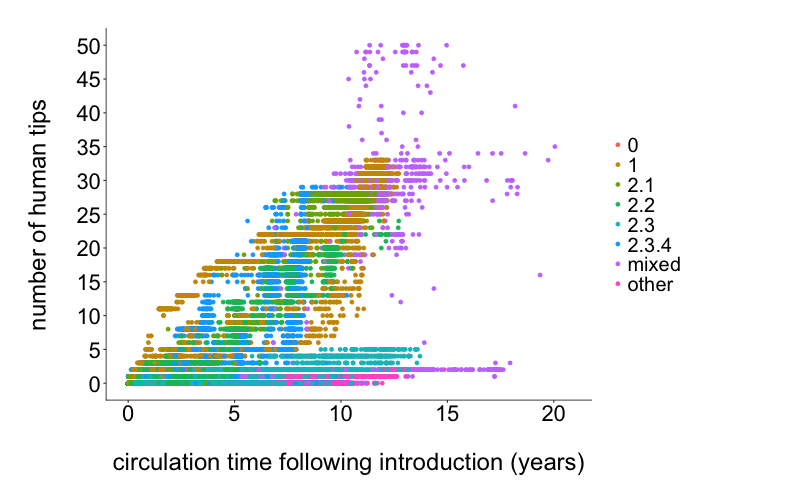

In [97]:
%%R -w 800 -h 500 -u px -i df_with_clade,current_date,human_color,wild_color,domestic_color # this sets the size of the plot...otherwise, it will go off the page

require(ggplot2)
library(ggplot2)
library(RColorBrewer)


output_filename = paste("circulation-time-vs-human-tips-clade-subset-",current_date,".png", sep="")

p <- ggplot(data=df_with_clade, aes(x=circulation_time, y=n_human_tips, color=clade_group), alpha = 0.5) + 
    geom_point()+
    labs(x="\ncirculation time following introduction (years)", y="number of human tips\n")+
    scale_y_continuous(breaks=seq(0,50,5), limits=c(0,50))+
    #scale_x_continuous(breaks=seq(0,15,3), limits=c(0,15))+
    theme(panel.grid.major=element_line(colour=NA,size=NA))+    
    theme(panel.grid.minor=element_line(colour=NA,size=NA))+    
    theme(strip.background = element_rect(colour=NA, fill=NA))+
    theme(axis.line.x=element_line(colour="black"))+
    theme(axis.line.y=element_line(colour="black"))+
    theme(axis.title=element_text(size=24, vjust=5))+
    theme(axis.text.y=element_text(size=22, colour="black"))+
    theme(axis.text.x=element_text(size=22, colour="black", hjust=0.5))+
    theme(legend.text=element_text(size=20))+
    theme(legend.title=element_blank())+
    theme(panel.margin=unit(1, "lines"))+
    theme(plot.margin=unit(c(1,4,1,1),"cm"))+
    theme(legend.key.size=unit(0.7, "cm"))+
    theme(panel.background=element_rect(fill=NA))+
    theme(legend.key=element_rect(fill=NA))
    ##theme(legend.position = c(legend_x, legend_y))

ggsave(output_filename, width = 10, height = 6, device = "png", path = "figures", dpi = 300)
p